<a href="https://colab.research.google.com/github/Nisasoylu/GNN/blob/main/Graph_Neural_Networks_(GNNs)_with_PyG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural networks that can directly be applied to graphs. GNN provides a classification & prediction tasks at**:
- Node level
- Edge level
- Graph level

**Mainly 3 types**:
- Recurrent Graph Neural Network
- Spatial Convolutional Network
- Spectral Convolutional Network

**GNN can help us to perform**:
- Node classification
- Link/Edge prediction
- graph classification

**GNN data models**:
- Single Mode: A single graph consists of large collection of nodes.
- Batch Mode: A graph collection of various graphs, each graph may have one or multiple nodes.

**GNN principle**:
- Nodes have neighbors and connections.
- Removing the neighbors and connections around a node, node will lose all its information.
- Neighbors of a node and connections to neighbors define the concepts of the node.

**Node embeddings**:
- Every node represents its concept as a state (x)
- The node state (x) produces the decision about its concepts as output (o)
- The final state (x_n) of the node is normally called "node embedding".

The task of all GNN is to determine the "node embedding" of each node, by looking at the information on its neighboring nodes.

**Relatipnship between GNN and CNN (CNN + GNN = GCN (Graph Convolutional Network))**

**GCN has 3 different operations**:
- Graph convolution
- Linear layer
- Nonlinear activation

**Image as graph data**:
- Each node represents each pixel.
- Node feature represents the pixel value.
- Edge feature represents the Euclidean distance between each pixel.
- The closer 2 pixels are to each other, the larger edge values.

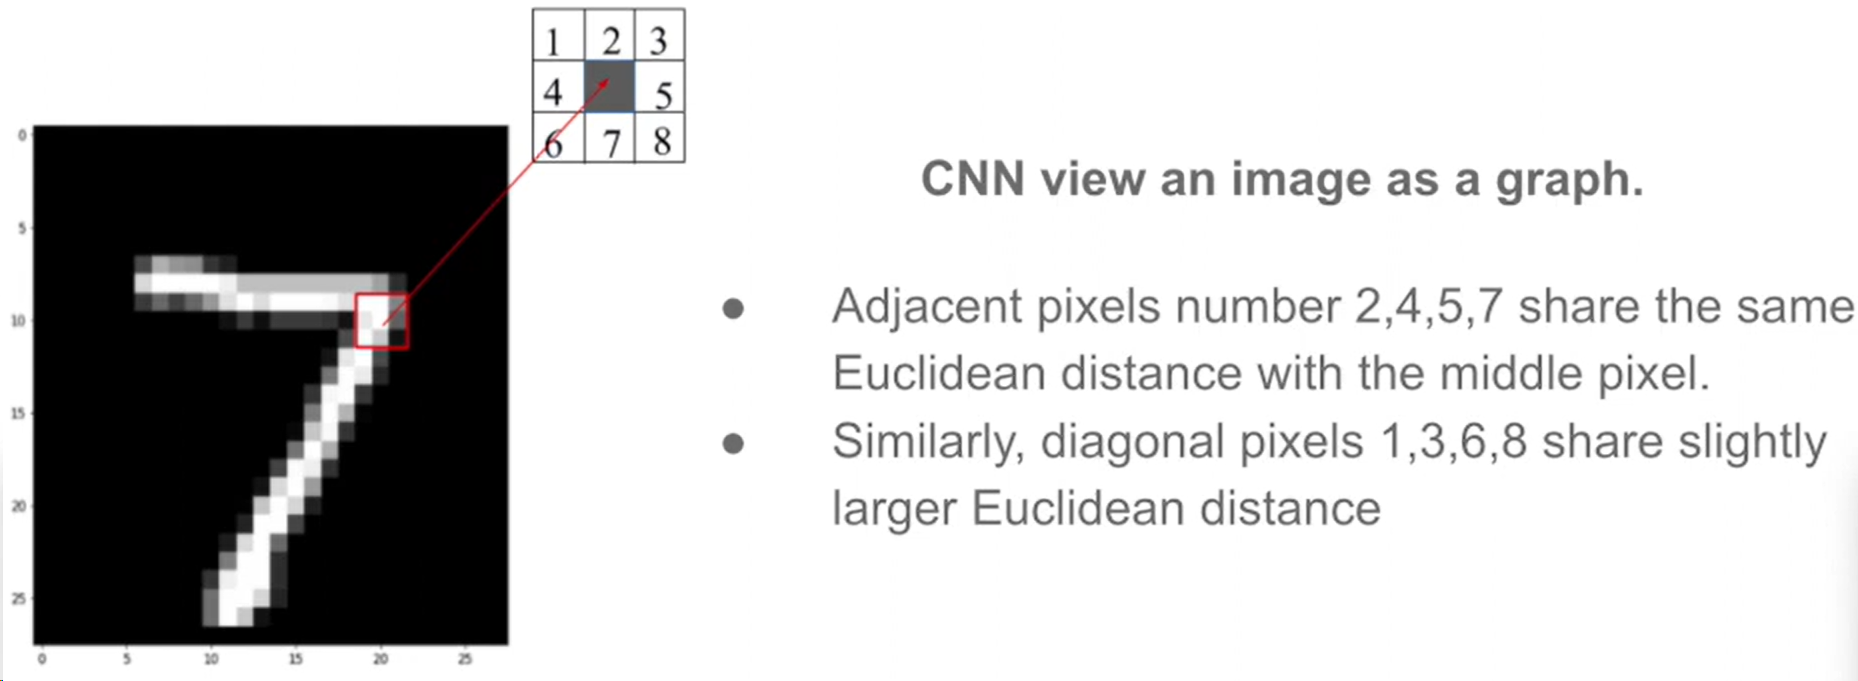

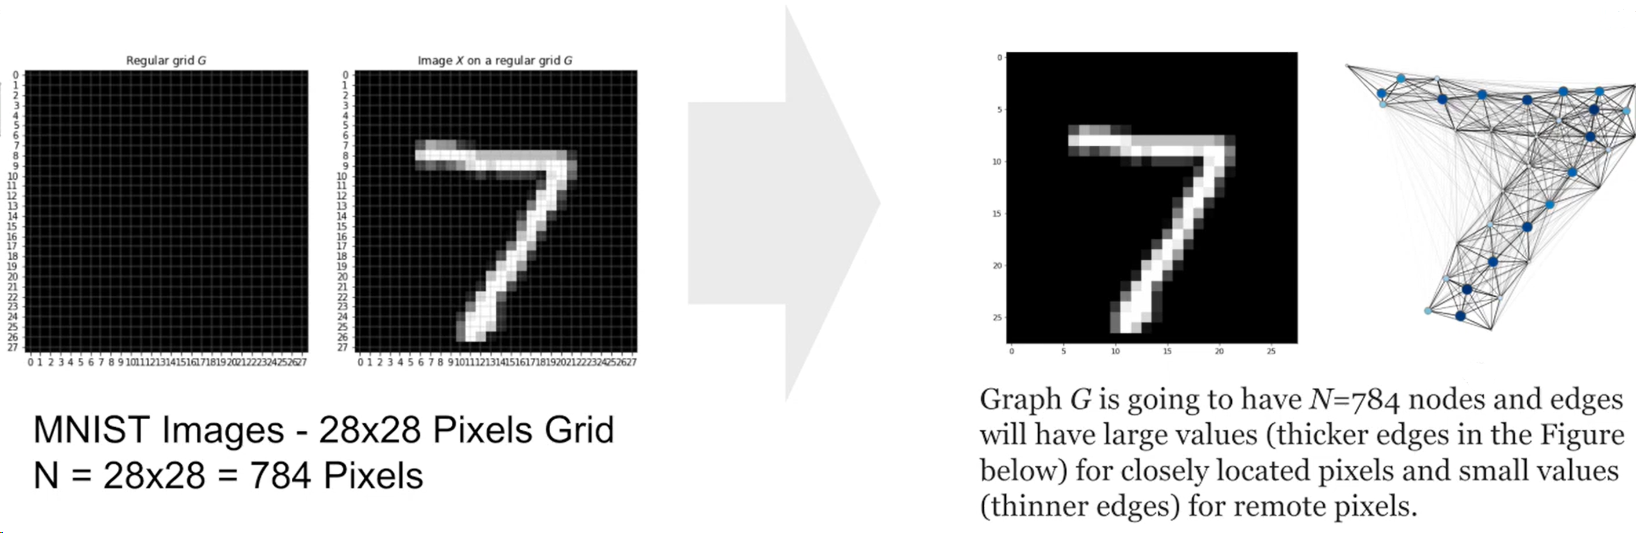

**What is a tensor?**
- A tensor is a n-dimensional array with n>2.

PyG (PyTorch Geometric) is a library built upon PyTorch to easily write and train GNNs for a wide range of applications related to structured data and tensor structure is used during the design.

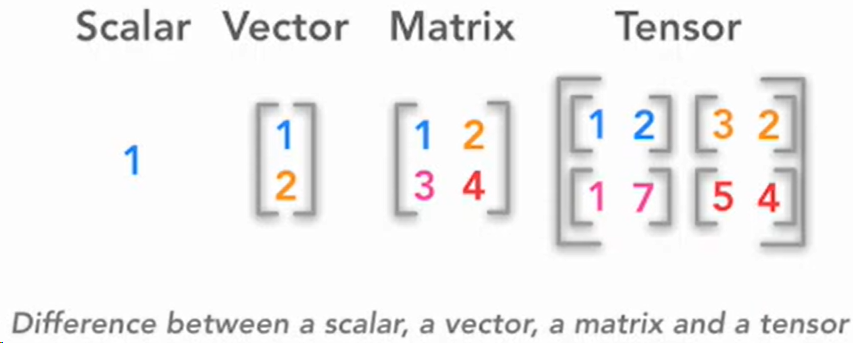

In [ ]:
!python -c "import torch; print(torch.version.cuda)"
# PyTorch version
!python -c "import torch; print(torch.__version__)"

!pip install torch-geometric

12.1
2.2.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00


In [ ]:
#!pip install torch-sparse

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

Enzymes Dataset:

In [ ]:
dataset_enyzmes = TUDataset(root = "/tmp/ENZYMES", name = "ENZYMES")

print(f"Number of graphs: {len(dataset_enyzmes)}")
print(f"Number of node features: {dataset_enyzmes.num_features}")
print(f"Number of classes: {dataset_enyzmes.num_classes}")
print(f"Dataset: {dataset_enyzmes} -> ENZYMES Dataset with 600 graphs.")

Number of graphs: 600
Number of node features: 3
Number of classes: 6
Dataset: ENZYMES(600) -> ENZYMES Dataset with 600 graphs.


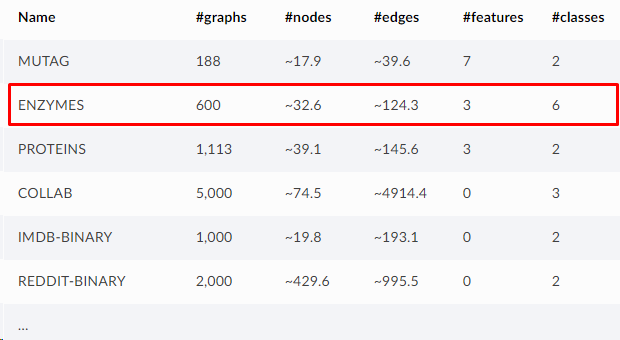

- data.x: Node feature matrix with shape [num_nodes, num_node_features]
- data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
- data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]
- data.y: Target to train against (may have arbitrary shape), e.g., node level targets of shape [num_nodes, *] or graph-level targets of shape [1,*]
- data.pos: Node position matrix with shape [num_nodes, num_dimensions]

In [ ]:
data_enyzmes = dataset_enyzmes[599]
print(data_enyzmes)
print(type(data_enyzmes))

Data(edge_index=[2, 156], x=[48, 3], y=[1])
<class 'torch_geometric.data.data.Data'>


For example for the last graph in the dataset, we have in total 48 nodes with 3 features each and 156 edges.

In [ ]:
networkX_graph = to_networkx(data_enyzmes)
print(type(networkX_graph))
networkX_graph.number_of_nodes(), networkX_graph.number_of_edges()

<class 'networkx.classes.digraph.DiGraph'>


(48, 156)

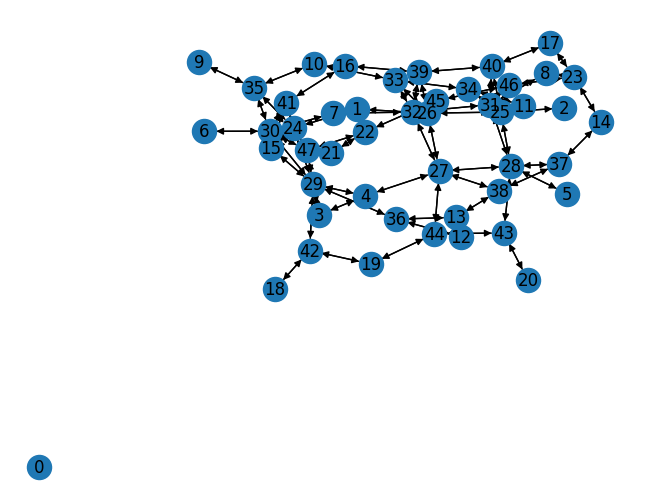

In [ ]:
nx.draw(networkX_graph, with_labels=True)

Cora Dataset:

The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words. - Papers with Code.

https://graphsandnetworks.com/the-cora-dataset/

In [ ]:
dataset_cora = Planetoid(root = "/tmp/Cora", name = "Cora")

In [ ]:
print(f"Number of graphs {len(dataset_cora)}")
print(f"Number of features {dataset_cora.num_features}")
print(f"Number of classes {dataset_cora.num_classes}")

Number of graphs 1
Number of features 1433
Number of classes 7


In [ ]:
data_cora = dataset_cora[0]
print(data_cora)
print(type(data_cora))

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
<class 'torch_geometric.data.data.Data'>


In [ ]:
print(f"Number of nodes {data_cora.num_nodes}")
print(f"Number of edges {data_cora.num_edges}")

print(f"Number of node features {data_cora.num_node_features}")
print(f"Number of edge features {data_cora.num_edge_features}")

Number of nodes 2708
Number of edges 10556
Number of node features 1433
Number of edge features 0


In [ ]:
networkX_graph_cora = to_networkx(data_cora)
print(type(networkX_graph_cora))
networkX_graph_cora.number_of_nodes(), networkX_graph_cora.number_of_edges()

<class 'networkx.classes.digraph.DiGraph'>


(2708, 10556)

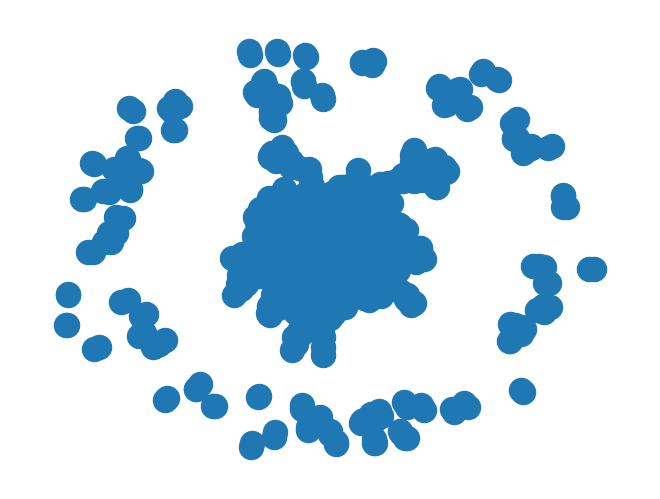

In [ ]:
nx.draw(networkX_graph_cora, with_labels=False)

In [ ]:
networkX_graph_cora.is_directed()

True

In [ ]:
import pandas as pd
import os

data_dir = os.path.expanduser("/content/drive/My Drive/GNN/cora")
cora_dataset = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep="\t", header=None, names=["target", "source"])
cora_dataset["label"] = "cites"

In [ ]:
cora_dataset.head()

,target,source,label
0,35,1033,cites
1,35,103482,cites
2,35,103515,cites
3,35,1050679,cites
4,35,1103960,cites


In [ ]:
cora_dataset.sample(frac=1).head(5)

,target,source,label
492,1688,1136814,cites
3441,62718,127033,cites
185,114,136665,cites
2032,15429,9513,cites
3877,94229,1123087,cites


In [ ]:
# nx.from_pandas_edgelist() is a function provided by NetworkX to create a graph from a Pandas DataFrame representing an edgelist.
# edge_attr="label" specifies that the DataFrame contains an attribute named "label" that represents the edge labels. This parameter is used to specify the name of the column in the DataFrame that contains edge attributes.
cora_dataset_graph = nx.from_pandas_edgelist(cora_dataset, edge_attr = "label")

# nx.set_node_attributes() is a function provided by NetworkX to set node attributes for a given graph.
# "paper" is the value of the node attribute that will be set for all nodes in the graph.
nx.set_node_attributes(cora_dataset_graph, "paper", "label")

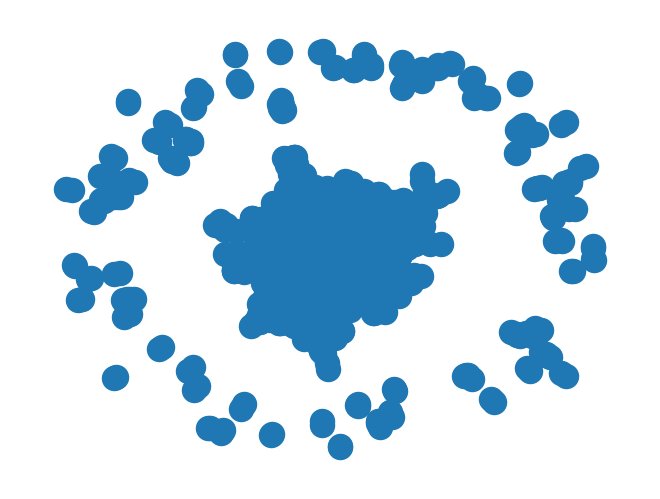

In [ ]:
nx.draw(cora_dataset_graph)

In [ ]:
cora_dataset_graph.number_of_nodes(), cora_dataset_graph.number_of_edges()

(2708, 5278)

In [ ]:
cora_adjacency_matrix = nx.adjacency_matrix(cora_dataset_graph)
print(cora_adjacency_matrix.todense())

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
